Riley Estes
EE 399 HW1
4/4/2023

In [36]:
#Git:
#https://github.com/rileywe

#imports necessary libraries
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
#defines X dimension and Y data for each point in X
X = np.arange(0,31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

In [3]:
#Given:
#c = parameters for fitting model(numpy array of len = 4)
#x = x positioning data
#y = y data, should be same length as x
#Outputs:
#lse1: the least-squared-error of the fitting function (f(x) = Acos(Bx) + Cx + D) as a numpy array
#across all data points in x and y. Uses the given values in c (with c[0] being A, c[1] is B and so on). 
def fit1(c, x, y):
    lse1 = np.sqrt(np.sum((c[0]*np.cos(c[1]*x) + c[2]*x + c[3] - y)**2)/31)
    return lse1

In [4]:
#initializes default guess values for the model's parameters
c0 = np.array([4, 0.9, 0.8, 30])
#uses scipy.optimize.minimize function to minimize the output of the above function (and thus the error of the model) by
#changing the parameters inputted to it. The parameters start at values in c0. 
optimized = opt.minimize(fit1, c0, args=(X, Y), method="Nelder-Mead")
#grabs optimized parameters into new len = 4 c array
c = optimized.x

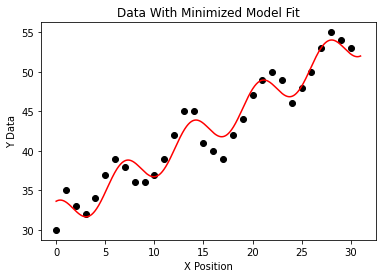

In [6]:
#using the new parameters, sets up an x axis and graphs the new output of the fitting model against the observed data
xAxis = np.arange(0, 31.01, 0.01)
yData = c[0]*np.cos(c[1]*xAxis) + c[2]*xAxis + c[3]

plt.plot(X, Y, "ko")
plt.plot(xAxis, yData, "r-")
plt.title("Data With Minimized Model Fit")
plt.xlabel("X Position")
plt.ylabel("Y Data")
plt.show()

The given function works well with the given data, however it's difficult to select the right starting values that optimize to best minimize the error. Many starting values produce a linear fit or a rapidly oscillating fit, neither of which work very well. After testing, the selected starting values for c0 produce a pretty good fit for the data with this model. 

In [8]:
#This function will sweep 2 of the 4 variables in the previous optimization function and create a 2D array of the error as both variables
#are individually adjusted. 
#c is array of variables from optimization function
#var1 and var2 are indices of c to be swept
#x, y are x axis and output (y) data for the observed data set. Assumes size of 31. 
#The output errorMap is a 2D numpy array of the error at each value of var2 and var1 corresponding to the x and y axis respectively
def sweep (cin, var1, var2, x, y):
    c = cin.copy()
    rg = np.arange(-5, 5.01, 0.01)
    rg1 = rg + c[var1]
    rg2 = rg + c[var2]
    errorMap = np.empty(shape = (len(rg), len(rg)))
    for i in range(0, len(rg)):
        c[var1] = rg1[i]
        for j in range(0, len(rg)):
            c[var2] = rg2[j]
            errorMap[i, j] = np.sqrt(np.sum((c[0]*np.cos(c[1]*x) + c[2]*x + c[3] - y)**2)/31)
    return errorMap


([<matplotlib.axis.YTick at 0x238861cae50>,
 [Text(0, 0, '-2.828'),
  Text(0, 250, '-0.32799999999999985'),
  Text(0, 500, '2.172'),
  Text(0, 750, '4.672000000000001'),
  Text(0, 1000, '7.172000000000001')])

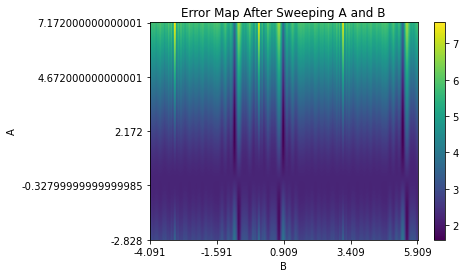

In [20]:
#rounds the parameters to 3 decimal points to more easily graph the following error map results
cR = np.round(c, 3)

#The following blocks of code sweep and plot every pair of parameters possible in order to see how changing each of the parameters changes the error. 
#the graphs show a color map of the error as the swept parameters are changed according to the axis labels. Each sweep includes 1000 individual points. 
#x axis is one variable, y axis is the other. data points are the error when the values of those two variables are plugged in (with the other two remaining the same).
plt.pcolor(sweep(c, 0, 1, X, Y))
plt.colorbar()
plt.title("Error Map After Sweeping A and B")
plt.ylabel("A")
plt.xlabel("B")
plt.xticks(ticks=[0, 250, 500, 750, 1000], labels = [cR[1]-5, cR[1]-2.5, cR[1], cR[1]+2.5, cR[1]+5])
plt.yticks(ticks=[0, 250, 500, 750, 1000], labels = [cR[0]-5, cR[0]-2.5, cR[0], cR[0]+2.5, cR[0]+5])

([<matplotlib.axis.YTick at 0x238862361c0>,
 [Text(0, 0, '-2.828'),
  Text(0, 250, '-0.32799999999999985'),
  Text(0, 500, '2.172'),
  Text(0, 750, '4.672000000000001'),
  Text(0, 1000, '7.172000000000001')])

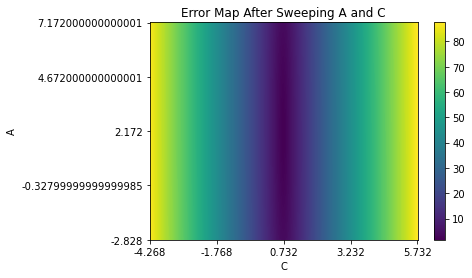

In [21]:
plt.pcolor(sweep(c, 0, 2, X, Y))
plt.colorbar()
plt.title("Error Map After Sweeping A and C")
plt.ylabel("A")
plt.xlabel("C")
plt.xticks(ticks=[0, 250, 500, 750, 1000], labels = [cR[2]-5, cR[2]-2.5, cR[2], cR[2]+2.5, cR[2]+5])
plt.yticks(ticks=[0, 250, 500, 750, 1000], labels = [cR[0]-5, cR[0]-2.5, cR[0], cR[0]+2.5, cR[0]+5])

([<matplotlib.axis.YTick at 0x238862e61c0>,
 [Text(0, 0, '-2.828'),
  Text(0, 250, '-0.32799999999999985'),
  Text(0, 500, '2.172'),
  Text(0, 750, '4.672000000000001'),
  Text(0, 1000, '7.172000000000001')])

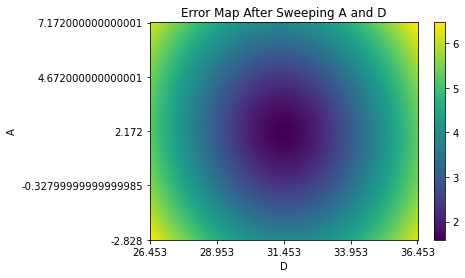

In [22]:
plt.pcolor(sweep(c, 0, 3, X, Y))
plt.colorbar()
plt.title("Error Map After Sweeping A and D")
plt.ylabel("A")
plt.xlabel("D")
plt.xticks(ticks=[0, 250, 500, 750, 1000], labels = [cR[3]-5, cR[3]-2.5, cR[3], cR[3]+2.5, cR[3]+5])
plt.yticks(ticks=[0, 250, 500, 750, 1000], labels = [cR[0]-5, cR[0]-2.5, cR[0], cR[0]+2.5, cR[0]+5])

([<matplotlib.axis.YTick at 0x23886a45e20>,
 [Text(0, 0, '-4.091'),
  Text(0, 250, '-1.591'),
  Text(0, 500, '0.909'),
  Text(0, 750, '3.409'),
  Text(0, 1000, '5.909')])

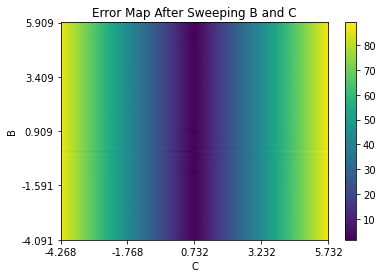

In [23]:
plt.pcolor(sweep(c, 1, 2, X, Y))
plt.colorbar()
plt.title("Error Map After Sweeping B and C")
plt.ylabel("B")
plt.xlabel("C")
plt.xticks(ticks=[0, 250, 500, 750, 1000], labels = [cR[2]-5, cR[2]-2.5, cR[2], cR[2]+2.5, cR[2]+5])
plt.yticks(ticks=[0, 250, 500, 750, 1000], labels = [cR[1]-5, cR[1]-2.5, cR[1], cR[1]+2.5, cR[1]+5])

([<matplotlib.axis.YTick at 0x23886ab5dc0>,
 [Text(0, 0, '-4.091'),
  Text(0, 250, '-1.591'),
  Text(0, 500, '0.909'),
  Text(0, 750, '3.409'),
  Text(0, 1000, '5.909')])

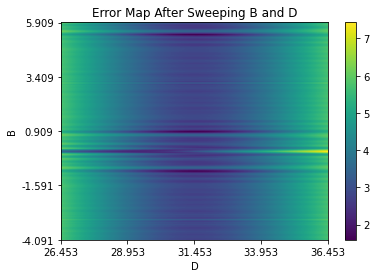

In [24]:
plt.pcolor(sweep(c, 1, 3, X, Y))
plt.colorbar()
plt.title("Error Map After Sweeping B and D")
plt.ylabel("B")
plt.xlabel("D")
plt.xticks(ticks=[0, 250, 500, 750, 1000], labels = [cR[3]-5, cR[3]-2.5, cR[3], cR[3]+2.5, cR[3]+5])
plt.yticks(ticks=[0, 250, 500, 750, 1000], labels = [cR[1]-5, cR[1]-2.5, cR[1], cR[1]+2.5, cR[1]+5])

([<matplotlib.axis.YTick at 0x23886b63220>,
 [Text(0, 0, '-4.268'),
  Text(0, 250, '-1.768'),
  Text(0, 500, '0.732'),
  Text(0, 750, '3.232'),
  Text(0, 1000, '5.732')])

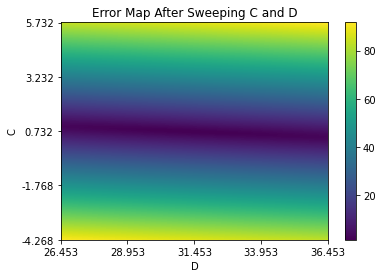

In [25]:
plt.pcolor(sweep(c, 2, 3, X, Y))
plt.colorbar()
plt.title("Error Map After Sweeping C and D")
plt.ylabel("C")
plt.xlabel("D")
plt.xticks(ticks=[0, 250, 500, 750, 1000], labels = [cR[3]-5, cR[3]-2.5, cR[3], cR[3]+2.5, cR[3]+5])
plt.yticks(ticks=[0, 250, 500, 750, 1000], labels = [cR[2]-5, cR[2]-2.5, cR[2], cR[2]+2.5, cR[2]+5])

Interestingly, some variable combinations lead to very neat bars or circles where the error is minimized, and some create a bar-like structure but have inconsistencies and aren't as smooth. Most surprisingly, the graph for A and B does not have a minima at the parameters generated by the minimization function like all the other combinations do. This could be an error in the function, but it is more likely a result of the difficulties of maximising every parameter relative to each other, because one you change one of them, another may become unoptomized. 

In [34]:
#This function will take training and test data and apply 3 separate fits to the data, and print the least-squares training and testing errors for each fit.
#The fits are a 19th degree polynomial, a parabola, and a line. 
#The function assumes a training data size of 20 points, and a test size of 10 points. 
def threeFits(trainingx, trainingy, testx, testy):
    p19c = np.polyfit(trainingx, trainingy, 19)
    parac = np.polyfit(trainingx, trainingy, 2)
    linec = np.polyfit(trainingx, trainingy, 1)

    p19TrainingError = np.sqrt(np.sum((np.polyval(p19c, trainingx)-trainingy)**2)/20)
    paraTrainingError = np.sqrt(np.sum((np.polyval(parac, trainingx)-trainingy)**2)/20)
    lineTrainingError = np.sqrt(np.sum((np.polyval(linec, trainingx)-trainingy)**2)/20)

    p19TestError = np.sqrt(np.sum((np.polyval(p19c, testx)-testy)**2)/10)
    paraTestError = np.sqrt(np.sum((np.polyval(parac, testx)-testy)**2)/10)
    lineTestError = np.sqrt(np.sum((np.polyval(linec, testx)-testy)**2)/10)

    print("19th degree polynomial training error: " + str(p19TrainingError))
    print("19th degree polynomial test error: " + str(p19TestError))
    print()
    print("Parabola training error: " + str(paraTrainingError))
    print("Parabola test error: " + str(paraTestError))
    print()
    print("Linear training error: " + str(lineTrainingError))
    print("Linear test error: " + str(lineTestError))
    print()



In [35]:
#The above three fits are tested with 2 sets of training and testing data:
#first 20 points are training, the rest are test:
trainingx1 = X[0:20]
trainingy1 = Y[0:20]
testx1 = X[20:]
testy1 = Y[20:]
print("Three fits using the first 20 points as training data: ")
threeFits(trainingx1, trainingy1, testx1, testy1)


#first and last 10 points are training, middle 10 are test:
trainingx2 = np.concatenate((X[0:10], X[20:]))
trainingy2 = np.concatenate((Y[0:10], Y[20:]))
testx2 = X[10:20]
testy2 = Y[10:20]
print("Three fits using the first and last 10 points as training data: ")
threeFits(trainingx2, trainingy2, testx2, testy2)

Three fits using the first 20 points as training data: 
19th degree polynomial training error: 0.028351503968806435
19th degree polynomial test error: 30014552335.054577

Parabola training error: 2.1255393482773766
Parabola test error: 9.138955088704021

Linear training error: 2.242749386808538
Linear test error: 3.5278140684148713

Three fits using the first and last 10 points as training data: 
19th degree polynomial training error: 0.22985380392010848
19th degree polynomial test error: 81.93347036362427

Parabola training error: 1.8539103336142582
Parabola test error: 2.9353026962885425

Linear training error: 1.8540519017402208
Linear test error: 2.948751607976004



C:\Users\Riley\AppData\Local\Temp\ipykernel_1132\2120926773.py:7: RankWarning: Polyfit may be poorly conditioned
  threeFits(trainingx1, trainingy1, testx1, testy1)
C:\Users\Riley\AppData\Local\Temp\ipykernel_1132\2120926773.py:16: RankWarning: Polyfit may be poorly conditioned
  threeFits(trainingx2, trainingy2, testx2, testy2)


Notice how in the first data set, the 19th degree polynomial extremely high error for the test, yet very little for the training data. This is a sign of very high overtraining due to the over optimization that a 19th degree polynomial with too many turns and extreme values will generate. The 19th degree polynomial works better with the better distributed second set, yet the error is still too high to be considered good. 
The parabola fit works much better, but is still not the best. The first data set was considerably bad against the test data, and okay against the training. In the second set, the training error only slightly improved, but the test error improved drastically to a range very similar to the linear fit. 
The linear fit performed the best in the first data set, with a training error similar to the parabola training error, but a much better test error. The second data set only saw slight improvements in both errors, and actually performed just barely worse than the parabolic fit against both the training and test data. 